In [10]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
random_state = 42

In [2]:
X = pd.read_pickle("../../../BIO_Ml/Schizophrenia/one_by_one/mvals_train_val.pkl")
y = pd.read_pickle("../../../BIO_Ml/Schizophrenia/one_by_one/pheno_train_val.pkl")["Status"]

In [3]:
print(X.head())
y = LabelEncoder().fit_transform(y)
print(y)

            cg18147296  cg13938959  cg12445832  cg23999112  cg11527153  \
subject_id                                                               
GSM4599914    2.762321    0.843977   -0.016555    1.372435    3.005380   
GSM4599916    2.685985    1.294113   -0.249022    0.993145    2.790599   
GSM4599917    2.854838    1.527030   -0.310427    1.113818    3.004341   
GSM4599919    2.889056    1.682198    0.389953    1.793420    3.201766   
GSM4599923    2.943605    0.930647   -0.436929    1.068895    2.669822   

            cg04195702  cg08128007  cg23733394  cg13371836  cg04407431  ...  \
subject_id                                                              ...   
GSM4599914    2.615756    2.206671   -1.367863   -4.865131   -5.510768  ...   
GSM4599916    2.906080    2.203198   -1.799485   -4.631597   -5.251224  ...   
GSM4599917    2.778681    2.183322   -0.678120   -4.859093   -4.796586  ...   
GSM4599919    2.643427    2.676389    1.185422   -4.666803   -5.072614  ...   
GSM4599

In [4]:
selector_k = SelectKBest(score_func=f_classif, k=42)
fit = selector_k.fit(X, y)
cols = selector_k.get_support(indices=True)
X = X.iloc[:, cols]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=random_state,
                                                    shuffle=True,
                                                    stratify=y)

In [7]:
classifier = SVC(kernel="poly",
                 C=1.5,
                 random_state=random_state)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       383
           1       0.79      0.77      0.78       423

    accuracy                           0.77       806
   macro avg       0.77      0.77      0.77       806
weighted avg       0.77      0.77      0.77       806



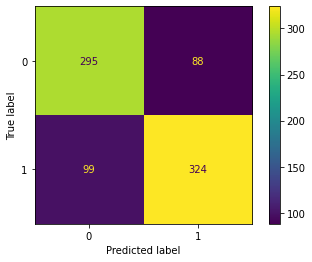

In [12]:
print(classification_report(y_true=y_test, y_pred=y_pred))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)